In [52]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

/tmp/ipykernel_11647/912229180.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [53]:
from pathlib import Path
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import folium.plugins
from itertools import product
from pyproj import Geod
wgs84_geod = Geod(ellps='WGS84') # Distance will be measured in meters on this ellipsoid - more accurate than a spherical method
from tqdm import tqdm

time_step, time_start, time_end=timedelta(minutes=30), datetime(2020, 2, 2, 0, 0, 0), datetime(2021, 5, 3, 23, 59, 59)
timepoints = np.arange(time_start, time_end, time_step)

In [54]:
actions = pd.read_csv((Path.cwd().parent / 'data' / 'processed' / 'actions.csv'), parse_dates=['Time'])

In [55]:
area_centers = pd.read_csv((Path.cwd().parent / 'data' / 'processed' / 'areas.csv'), index_col=0)

In [57]:
requests = pd.read_csv((Path.cwd().parent / 'data' / 'processed' / 'requests.csv'), parse_dates=['Created_Datetime_Local']).sort_values('Created_Datetime_Local')

In [ ]:
rental=pd.read_csv((Path.cwd().parent / 'data' / 'interim' / 'rental.csv'), parse_dates=['Start_Datetime_Local', 'End_Datetime_Local'])

In [ ]:
lens=[np.array([len(rental[(rental['Start_Datetime_Local']>timepoints[i]) & (rental['Start_Datetime_Local']<timepoints[i+1])]),
len(requests[(requests['Created_Datetime_Local']>timepoints[i]) & (requests['Created_Datetime_Local']<timepoints[i+1])])]) for i in tqdm(range(len(timepoints[:-1])))]

100%|██████████| 21935/21935 [27:02<00:00, 13.52it/s]


In [ ]:
lens=np.array(lens)

In [70]:
lens[(lens[:,1]>0)&(lens[:,0]<lens[:,1]),0]/lens[(lens[:,1]>0)&(lens[:,0]<lens[:,1]),1]

array([0.54545455, 0.28      , 0.02777778, ..., 0.12777778, 0.11510791,
       0.125     ])

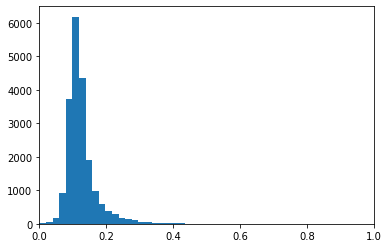

In [72]:
plt.hist(lens[(lens[:,1]>0)&(lens[:,0]<lens[:,1]),0]/lens[(lens[:,1]>0)&(lens[:,0]<lens[:,1]),1], bins=50)
plt.xlim((0,1))
plt.show()

In [76]:
len(lens[lens[:,1]==0])/len(lens)

0.040528835194894

In [78]:
d=lens[(lens[:,1]>0)&(lens[:,0]<lens[:,1]),0]/lens[(lens[:,1]>0)&(lens[:,0]<lens[:,1]),1]

In [80]:
d.mean()

0.12569502456295226

In [ ]:
start_map = folium.Map([55.6785706133019, 12.594427257404426], zoom_start=12, tiles='Stamen Toner')
for name, row in area_centers.iterrows():
    folium.CircleMarker(
        radius=5,
        location=[row['GPS_Latitude'], row['GPS_Longitude']],
        color="crimson",
        tooltip=name,
        fill=False,
    ).add_to(start_map)

In [ ]:
start_map